In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

## Read data

In [2]:
data = pd.read_csv("data/complete_dataframe.csv")

In [3]:
data.head()

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Año_de_nacimiento
0,0,12168427,311410,M,1995.0,2019-08-01 06:01:04,2019-08-01 06:09:46,155,18,NaN
1,1,12168428,355473,M,1983.0,2019-08-01 06:01:06,2019-08-01 06:04:22,76,69,NaN
2,2,12168431,246711,M,1990.0,2019-08-01 06:01:14,2019-08-01 06:14:23,256,208,NaN
3,3,12168432,410550,M,1993.0,2019-08-01 06:01:15,2019-08-01 06:04:50,82,168,NaN
4,4,12168433,522434,M,1961.0,2019-08-01 06:01:14,2019-08-01 06:14:06,229,28,NaN


## Convert string type to datetime type

In [4]:
data["Inicio_del_viaje"] = pd.to_datetime(data["Inicio_del_viaje"])

In [5]:
data = data.sort_values("Inicio_del_viaje")

In [6]:
data

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Año_de_nacimiento
11586440,0,42034,17636,M,1989.0,2015-01-01 00:03:06,2015-01-01 00:05:52,19,19,NaN
11586441,1,42046,10701,M,1986.0,2015-01-01 06:00:24,2015-01-01 06:03:53,37,25,NaN
11586442,2,42047,13525,M,1983.0,2015-01-01 07:06:08,2015-01-01 07:06:59,55,55,NaN
11586443,3,42048,17625,M,1980.0,2015-01-01 07:25:14,2015-01-01 07:33:13,81,54,NaN
11586444,4,42049,272,M,1980.0,2015-01-01 07:36:56,2015-01-01 07:48:33,79,9,NaN
...,...,...,...,...,...,...,...,...,...,...
11586435,318782,21058539,1221017,M,NaN,2021-10-31 23:55:32,2021-11-01 00:15:38,65,266,1997.0
11586436,318783,21058540,513364,M,NaN,2021-10-31 23:55:36,2021-11-01 00:00:02,176,160,1992.0
11586437,318784,21058545,421413,F,NaN,2021-10-31 23:57:43,2021-11-01 00:11:11,263,163,1986.0
11586438,318785,21058547,437252,F,NaN,2021-10-31 23:58:19,2021-11-01 00:10:55,263,163,1993.0


In [7]:
import datetime

In [8]:
oneDay = datetime.timedelta(1)

In [9]:
beginDate = pd.to_datetime("2015-01-01")
endDate   = pd.to_datetime("2021-10-31")

In [10]:
beginDate.day_of_week # 0, 1, 2, 3, 4, 5 or 6

3

In [11]:
beginDate = beginDate + oneDay*4
beginDate.day_of_week

0

In [12]:
endDate.day_of_week 

6

In [13]:
print(f"Intervalo de fechas: [{beginDate.date()}, {endDate.date()}]")

Intervalo de fechas: [2015-01-05, 2021-10-31]


In [14]:
data = data[data["Inicio_del_viaje"] >= beginDate]

In [15]:
data

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Año_de_nacimiento
11588510,2070,45269,2552,F,1985.0,2015-01-05 06:03:40,2015-01-05 06:13:30,30,75,NaN
11588511,2071,45270,13040,M,1982.0,2015-01-05 06:18:14,2015-01-05 06:30:31,57,80,NaN
11588512,2072,45271,12573,M,1948.0,2015-01-05 06:32:28,2015-01-05 06:52:10,27,44,NaN
11588513,2073,45272,11052,M,1987.0,2015-01-05 06:38:24,2015-01-05 06:39:54,3,4,NaN
11588514,2074,45273,17550,M,1982.0,2015-01-05 06:38:32,2015-01-05 06:44:45,45,4,NaN
...,...,...,...,...,...,...,...,...,...,...
11586435,318782,21058539,1221017,M,NaN,2021-10-31 23:55:32,2021-11-01 00:15:38,65,266,1997.0
11586436,318783,21058540,513364,M,NaN,2021-10-31 23:55:36,2021-11-01 00:00:02,176,160,1992.0
11586437,318784,21058545,421413,F,NaN,2021-10-31 23:57:43,2021-11-01 00:11:11,263,163,1986.0
11586438,318785,21058547,437252,F,NaN,2021-10-31 23:58:19,2021-11-01 00:10:55,263,163,1993.0


## Number of trips by day

In [16]:
n = data.shape[0] # Número de datos
n_days = (endDate - beginDate).days + 1
dates = [beginDate]*n_days
frecuencies = [0]*n_days

for i in range(1, n_days):
    dates[i] = dates[i-1] + oneDay

for d in tqdm(data["Inicio_del_viaje"]):
    frecuencies[(d-beginDate).days] += 1

100%|███████████████████████████████████████████████| 17395219/17395219 [02:13<00:00, 130712.62it/s]


In [17]:
new_df = pd.DataFrame({"date": dates, "trips": frecuencies})
new_df

,date,trips
0,2015-01-05,981
1,2015-01-06,970
2,2015-01-07,1165
3,2015-01-08,1186
4,2015-01-09,1189
...,...,...
2487,2021-10-27,12195
2488,2021-10-28,12209
2489,2021-10-29,11985
2490,2021-10-30,8196


In [18]:
new_df.to_csv("data/ts-by-day.csv") # save

### Gráficas

In [19]:
import matplotlib.pyplot as plt

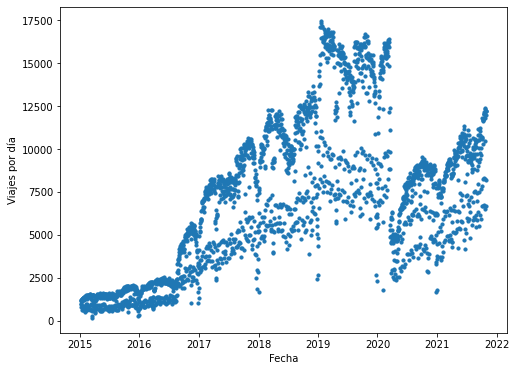

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(new_df.date, new_df.trips, s=10)
plt.xlabel("Fecha")
plt.ylabel("Viajes por día")

plt.savefig("trips_daily.png", transparent=True)

### Agrupando por día de la semana

In [51]:
days_of_week = [d.day_of_week for d in new_df["date"]]

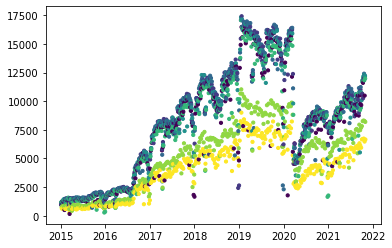

In [52]:
plt.scatter(new_df.date, new_df.trips, s=10, c=days_of_week)
plt.show()

## Number of trips per week

In [53]:
groups = new_df.groupby(days_of_week) # agrupa por día de la semana

In [54]:
day_names = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"] # nombres de días de la semana

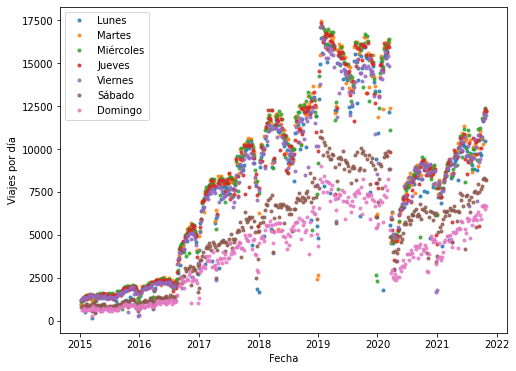

In [55]:
plt.figure(figsize=(8,6))
for name, group in groups:
    plt.plot(group.date, group.trips, marker='o', linestyle='', markersize=3, label=f"{day_names[name]}", alpha=0.8)

plt.xlabel("Fecha")
plt.ylabel("Viajes por día")
plt.legend()
plt.savefig("trips_daily_by_day.png", transparent=True)

In [56]:
A = np.array(new_df.iloc[groups.indices[0].tolist()].trips)
for i in range(1,6):
    A += np.array(new_df.iloc[groups.indices[i].tolist()].trips)

B = np.array(new_df.iloc[groups.indices[0].tolist()].date)

In [57]:
groups = new_df.groupby(np.array(days_of_week) <= 4)

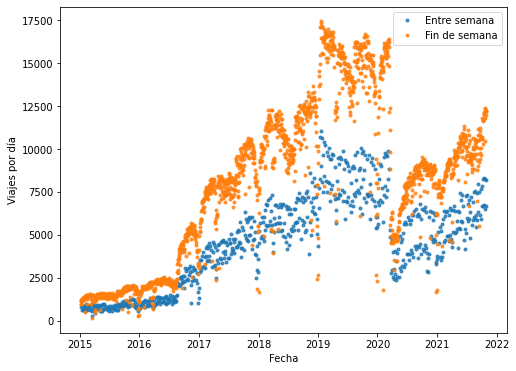

In [58]:
plt.figure(figsize=(8,6))
for name, group in groups:
    name = "Fin de semana" if name else "Entre semana"
    plt.plot(group.date, group.trips, marker='o', linestyle='', markersize=3, label=f"{name}", alpha=0.8)
    
plt.xlabel("Fecha")
plt.ylabel("Viajes por día")
plt.legend()
plt.savefig("trips_daily_by_weekend.png", transparent=True)

In [59]:
B.shape

(356,)

In [60]:
other_df = pd.DataFrame({"date": B, "trips": A, "stations": nStations})

In [61]:
other_df.to_csv("data/ts-by-week.csv")

In [62]:
other_df

,date,trips,stations
0,2015-01-05,6259,86
1,2015-01-12,6884,86
2,2015-01-19,7453,86
3,2015-01-26,7478,86
4,2015-02-02,6802,85
...,...,...,...
351,2021-09-27,59608,300
352,2021-10-04,64688,300
353,2021-10-11,66410,300
354,2021-10-18,68657,300


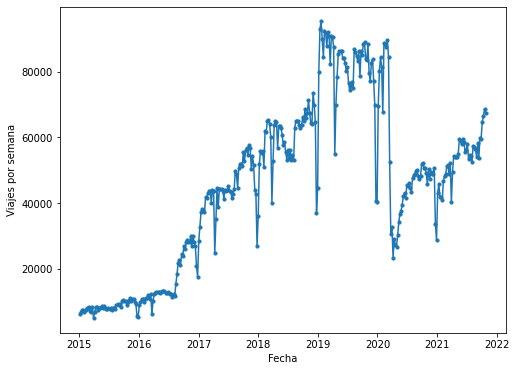

In [69]:
plt.figure(figsize=(8,6))
plt.plot(other_df.date, other_df.trips)
plt.scatter(other_df.date, other_df.trips, s=10)
plt.xlabel("Fecha")
plt.ylabel("Viajes por semana")
plt.savefig("trips_weekly.png", transparent=True)

# Extra

In [64]:
data.head()

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Año_de_nacimiento
11588510,2070,45269,2552,F,1985.0,2015-01-05 06:03:40,2015-01-05 06:13:30,30,75,NaN
11588511,2071,45270,13040,M,1982.0,2015-01-05 06:18:14,2015-01-05 06:30:31,57,80,NaN
11588512,2072,45271,12573,M,1948.0,2015-01-05 06:32:28,2015-01-05 06:52:10,27,44,NaN
11588513,2073,45272,11052,M,1987.0,2015-01-05 06:38:24,2015-01-05 06:39:54,3,4,NaN
11588514,2074,45273,17550,M,1982.0,2015-01-05 06:38:32,2015-01-05 06:44:45,45,4,NaN


In [39]:
nStations = []
seven = datetime.timedelta(7)

In [40]:
initDate = beginDate + seven
initIndex = 0
for i,d in enumerate(tqdm(data["Inicio_del_viaje"])):
    if d >= initDate:
        nStations.append(np.unique(data.iloc[initIndex:i][["Origen_Id", "Destino_Id"]].values).shape[0])
        initIndex = i
        initDate += seven
        
nStations.append(np.unique(data.iloc[initIndex:][["Origen_Id", "Destino_Id"]].values).shape[0])

100%|███████████████████████████████████████████████| 17395219/17395219 [00:40<00:00, 430568.88it/s]


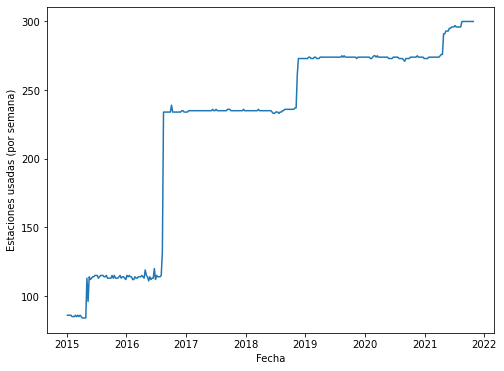

In [65]:
plt.figure(figsize=(8,6))
plt.plot(other_df.date, other_df.stations)
plt.xlabel("Fecha")
plt.ylabel("Estaciones usadas (por semana)")
plt.savefig("stations_weekly.png", transparent=True)

¿Será el número de estaciones una variable explicativa del número de viajes que se realizan?